# Activity 17


---
## Setup
---

##### Questoin 1-a

$$
A^T AA^T + \lambda A^T =  A^T (AA^T + \lambda I) = (A^T A + \lambda I) A^T
$$
We know
$$
A^T (AA^T + \lambda I) = (A^T A + \lambda I) A^T
$$
Multiply both sides by $ (A^T A + \lambda I)^{-1} $
$$
(A^T A + \lambda I)^{-1} A^T (A A^T + \lambda I) = (A^T A + \lambda I)^{-1} (A^T A + \lambda I) A^T
$$
$ (A^T A + \lambda I)^{-1} (A^T A + \lambda I) = I $
$$
(A^T A + \lambda I)^{-1} A^T (A A^T + \lambda I) = A^T
$$
Multiply both sides by $ (A A^T + \lambda I)^{-1} $
$$
(A^T A + \lambda I)^{-1} A^T (A A^T + \lambda I) (A A^T + \lambda I)^{-1} = A^T (A A^T + \lambda I)^{-1}
$$
$ (A^T A + \lambda I)^{-1} (A^T A + \lambda I) = I $
$$
(A^T A + \lambda I)^{-1} A^T = A^T (A A^T + \lambda I)^{-1}
$$

##### Question 1-b

$$
\|A w - y\|_2^2 + \lambda \|w\|_2^2
$$
We have 2 equations using the identity from 1-a
$$
w = (A^T A + \lambda I)^{-1} A^T y
$$
$$
w = A^T (A A^T + \lambda I)^{-1} y
$$

Solving the first formula is faster

##### Question 1-c

i)  
g: 100 x 8000
$$
w = (G^T G)^{-1} G^T y
$$
There is not a unique solution because the max rank of G is 100 but we have 8000 genes

ii)
$$
w = (G^T G + \lambda I)^{-1} G^T y
$$
There is a unique solution becase $ (G^T G + \lambda I) $ is invertible  

The left side of the equation in 1-a make the solution most computationally efficient

##### Question 2-a

$$
\min_w \|z - w\|_2^2 + \lambda r(w)
$$
$$
\sum_{i} (z_i - w_i)^2 + \lambda \sum_{i} w_i^2
$$

##### Question 2-b

$$
\sum_{i} (z_i - w_i)^2 + \lambda \sum_{i} |w_i|

$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def prxgraddescent_l2(X,y,tau,lam,w_init,it):

## compute it iterations of L2 proximal gradient descent starting at w1
## w_{k+1}= (w_k - tau*X'*(X*w_k - y)/(1+lam*tau)
## step size tau
    W = np.zeros((w_init.shape[0], it+1))
    Z = np.zeros((w_init.shape[0], it+1))
    W[:,[0]] = w_init
    for k in range(it):
        Z[:,[k+1]] = W[:,[k]] - tau * X.T @ (X @ W[:,[k]] - y);
        W[:,[k+1]] = Z[:,[k+1]]/(1+lam*tau)
        
    return W,Z

In [3]:
## Proximal gradient descent trajectories
## Least Squares Problem
U = np.array([[1, 0], [0, 1], [0, 0], [0, 0]])
S = np.array([[1, 0], [0, 0.5]])
Sinv = np.linalg.inv(S)
V = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
y = np.array([[np.sqrt(2)], [0], [1], [0]])

X = U @ S @ V.T

### Find Least Squares Solution
w_ls = V @ Sinv @ U.T @ y
c = y.T @ y - y.T @ X @ w_ls

### Find values of f(w), the contour plot surface for 
w1 = np.arange(-1,3,.1)
w2 = np.arange(-1,3,.1)
fw = np.zeros((len(w1), len(w2)))
for i in range(len(w2)):
    for j in range(len(w1)):
        w = np.array([ [w1[j]], [w2[i]] ])
        fw[i,j] = (w-w_ls).T @ X.T @ X @ (w-w_ls) + c


/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_21810/2784363303.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  fw[i,j] = (w-w_ls).T @ X.T @ X @ (w-w_ls) + c


---
## Question 3a)
---

<>:23: SyntaxWarning: invalid escape sequence '\l'
<>:23: SyntaxWarning: invalid escape sequence '\l'
/var/folders/tn/v9tpvrrs4qgdbw0xd1q0l8qh0000gn/T/ipykernel_21810/3544484896.py:23: SyntaxWarning: invalid escape sequence '\l'
  plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));


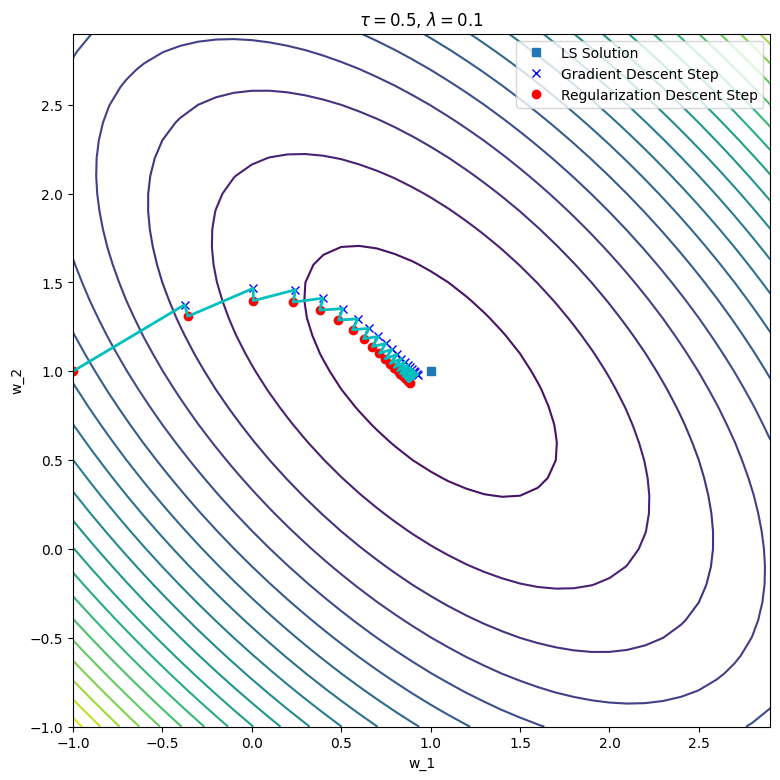

In [7]:

## Find and display weights generated by gradient descent

w_init = np.array([[-1],[1]])
lam = 0.1;
it = 20
tau = 0.5
W,Z = prxgraddescent_l2(X,y,tau,lam,w_init,it)

# Concatenate gradient and regularization steps to display trajectory
G = np.zeros((2,0))
for i in range(it):
    G = np.hstack((G,np.hstack((W[:,[i]],Z[:,[i+1]]))))

plt.figure(figsize=(9,9))
plt.contour(w1,w2,fw,20)
plt.plot(w_ls[0],w_ls[1],"s", label="LS Solution")
plt.plot(Z[0,1::],Z[1,1:],'bx',linewidth=2, label="Gradient Descent Step")
plt.plot(W[0,:],W[1,:],'ro',linewidth=2, label="Regularization Descent Step")
plt.plot(G[0,:],G[1,:],'-c',linewidth=2)
plt.legend()
plt.xlabel('w_1')
plt.ylabel('w_2')
plt.title('$\\tau = $'+str(.5)+', $\lambda = $'+str(lam));

The maximal $\tau$ that will garentue convergeance is:
$$
\tau < \frac{1}{||X||_{op}^2}
$$

---
## Question 3b)
---

The trajectory looks like it goes towards the optimal point but only on the bottom left side the inner oval.  
It most likely moves this way becasue the regualarization term is affect the maximum

##### Question 3-c

It converges to a point closer to the actual min and the steps are closer the to the normal ridge regresssion step